In [189]:
#IMPORTS
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [190]:
#load the data
data = pd.read_csv('data/34933-0001-Data.tsv', sep="\t")
#data = pd.read_csv('data/selection.tsv', sep="\t")
data.index = data.pop("CASEID")
data.head()

,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,...,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
CASEID,,,,,,,,,,,,,,,,,,,,,
1,50886467,2,4,4,991,9991,91,91,91,91,...,1,1,99,9,9,2,2,1275.597449,30054,2
2,13766883,2,99,99,991,9991,91,91,91,91,...,1,1,1,1,1,2,2,5191.071173,30031,1
3,17772877,2,99,99,991,9991,91,91,91,91,...,1,1,1,1,1,3,3,419.742011,30056,2
4,45622817,1,99,99,13,9999,99,2,93,93,...,1,1,2,1,1,2,2,1449.303889,30054,1
5,17239390,1,99,99,11,9999,99,4,93,93,...,1,1,1,1,1,1,1,15344.293577,30012,2


In [191]:
# Set IRALCFY to 0 for people who haven't had any drinks in the last 12 months/ever 
data['IRALCFY'].replace({991:0, 993:0}, inplace=True)

# Set IRMJFY to 0 for people who haven't had any MJ in the last 12 months/ever 
data['IRMJFY'].replace({991:0, 993:0}, inplace=True)


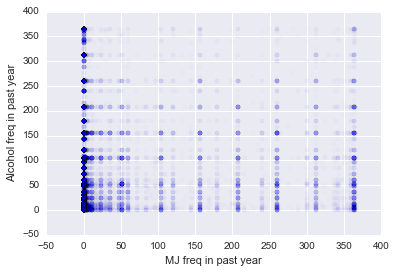

In [194]:
#Frequency(days/year) of Alcohol and MJ use in the past year
plt.scatter(y=data['IRALCFY'],x=data['IRMJFY'],alpha=0.01)
plt.ylabel('Alcohol freq in past year')
plt.xlabel("MJ freq in past year")
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


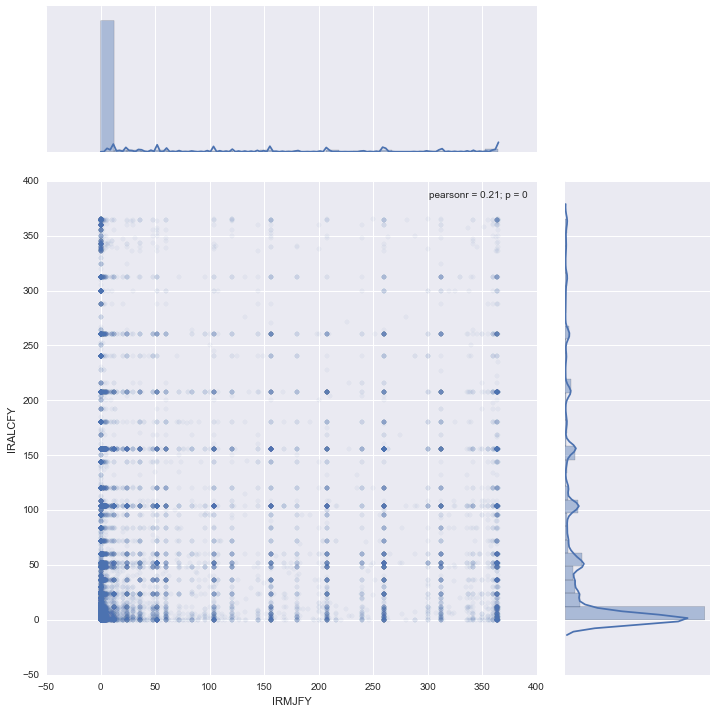

In [238]:
#JointPlot(scatter plot + distributions) 
#Frequency(days/year) of Alcohol and MJ use in the past year
sns.jointplot(y='IRALCFY',x='IRMJFY', data=data, 
              alpha=0.05, size=10, ratio=3, 
              marginal_kws={'bins':30,  'kde':True})


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


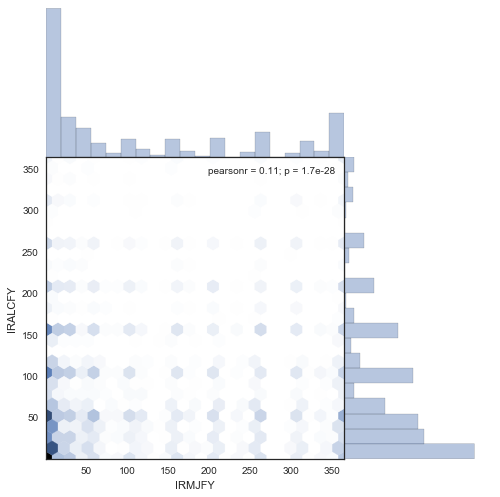

In [228]:
#Frequency(days/year) of Alcohol and MJ use in the past year, 
#excluding those who haven't used alcohool or MJ in the past year/ever
with sns.axes_style("white"):    
    sns.jointplot(y='IRALCFY',x='IRMJFY',data=data[data.IRALCFY>0][data.IRMJFY>0], 
            kind='hex', space=0, size=7, ratio=2, 
            marginal_kws={'bins':20})


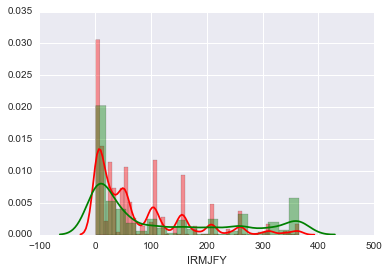

In [246]:
# Dist Plot of the alcogol frequnecy in the past year. 
# People who did not drink any alcohol in the past year are excluded
sns.distplot(data[data.IRALCFY>0].IRALCFY,color='red')
sns.distplot(data[data.IRMJFY>0].IRMJFY,color='green')

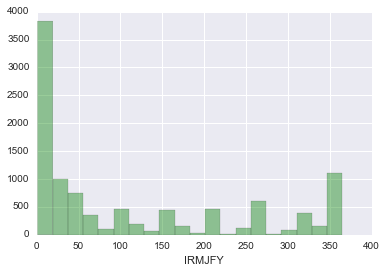

In [242]:

# Dist Plot of the MJ frequnecy in the past year. 
# People who did not consume any MJ in the past year are excluded
sns.distplot(data[data.IRMJFY>0].IRMJFY,color='green', kde=False)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


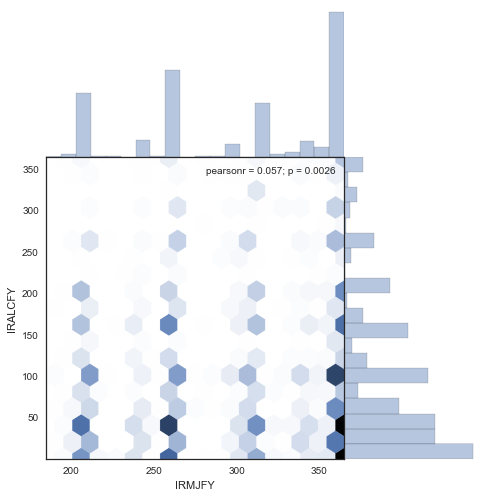

In [247]:
#Frequency(days/year) of Alcohol and MJ use in the past year, 
#excluding those who haven't used alcohool or MJ in the past year/ever
with sns.axes_style("white"):    
    sns.jointplot(y='IRALCFY',x='IRMJFY',data=data[data.IRALCFY>0][data.IRMJFY>184], 
            kind='hex', space=0, size=7, ratio=2, 
            marginal_kws={'bins':20})


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


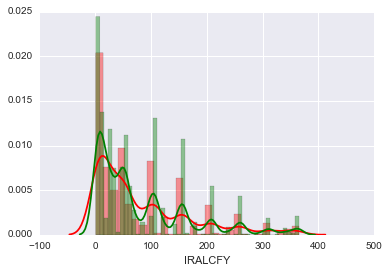

In [250]:
# Dist Plot of the alcogol frequnecy in the past year. 
# People who did not drink any alcohol in the past year are excluded
sns.distplot(data[data.IRALCFY>0][data.SPDYR==1].IRALCFY,color='red')
sns.distplot(data[data.IRALCFY>0][data.SPDYR==0].IRALCFY,color='green')